# Task 3 - Approximating non-linear vector fields

In [39]:
from utils import *

import numpy as np
import itertools
import matplotlib.pyplot as plt
import itertools


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's load and plot the data of the task:

In [40]:
x0Data = np.loadtxt('./data/nonlinear_vectorfield_data_x0.txt')
x1Data = np.loadtxt('./data/nonlinear_vectorfield_data_x1.txt')

In [41]:
print(x0Data.shape)
print(x1Data.shape)

(2000, 2)
(2000, 2)


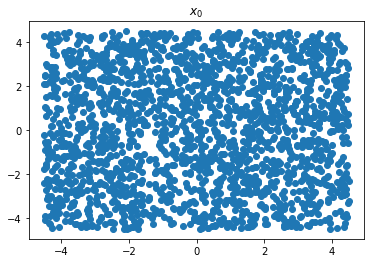

In [42]:
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.title("$x_0$");

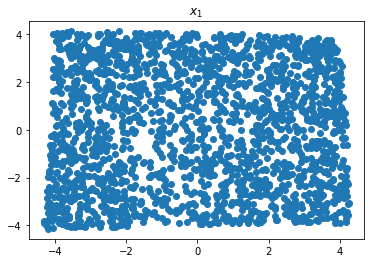

In [43]:
plt.scatter(x1Data[:,0], x1Data[:,1]);
plt.title("$x_1$");

Let's visualize how is the evolution of the vector field:

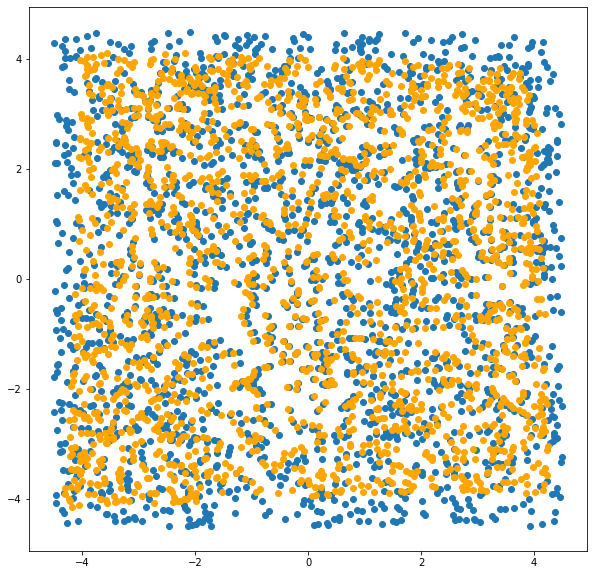

In [44]:
fig = plt.figure(figsize=(10,10))

# x_0 = blue dots; x_1 = red colorts
plt.scatter(x0Data[:,0], x0Data[:,1]);
plt.scatter(x1Data[:,0], x1Data[:,1], color='orange');

## 1st Part - Estimation of the linear vector field

We have to estimate the linear vector field used to generate the points $x_1$ from $x_0$.

First, lest use the finite-difference formula:
$$
\hat{v}^{(k)} = \frac{x_1^{(k)} - x_0^{(k)}}{\Delta t}
$$

In [45]:
v = x1Data - x0Data

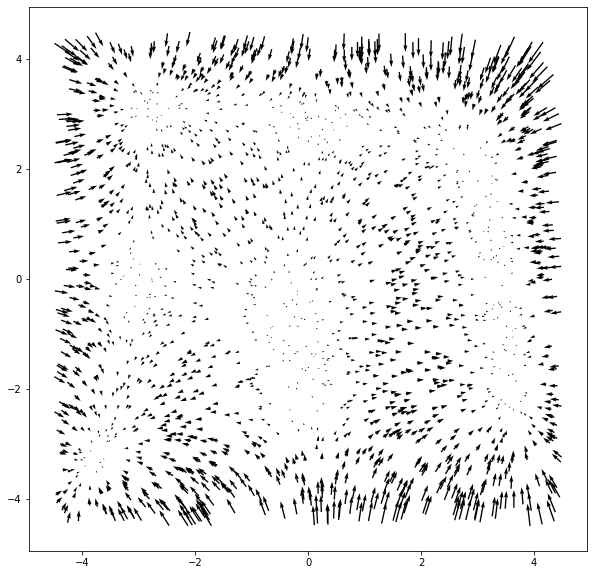

In [46]:
fig = plt.figure(figsize=(10, 10))
plt.quiver(x0Data[:,0], x0Data[:,1], v[:,0], v[:,1]);

Now, let's approximate the matrix $A \in \mathbb{R}^{2\times 2}$ such that

$$
\nu \left( x_0^{(k)} \right) = v^{(k)} = Ax_0^{k)}
$$

In [47]:
# Perform least-squares minimization (y = ax + b) for the x
ax, bx = leastSquaresMinimization(np.column_stack((x0Data[:,0], v[:,0])))

# Perform least-squares minimization (y = ax + b) for the y
ay, by = leastSquaresMinimization(np.column_stack((x0Data[:,1], v[:,1])))

Let's simulate the obtained system matrix up to a time $T_{end} = 0.1$:

In [48]:
t = 0.1

vx = np.polyval([ax, bx], x0Data[:, 0]) * t
vy = np.polyval([ay, by], x0Data[:, 1]) * t

newX1 = [vx + x0Data[:, 0], vy + x0Data[:, 1]]

Compute the MSE:

In [49]:
np.mean(np.sqrt((newX1[0] - x1Data[:,0])**2 + (newX1[1] - x1Data[:,1])**2)) 

0.18309099198739967

## 2nd Part - Approximate the vector field using Radial Basis Functions

The selected parameters are L = 100 and Epsilon = 0.005 with MSE = 3.3955703290541117


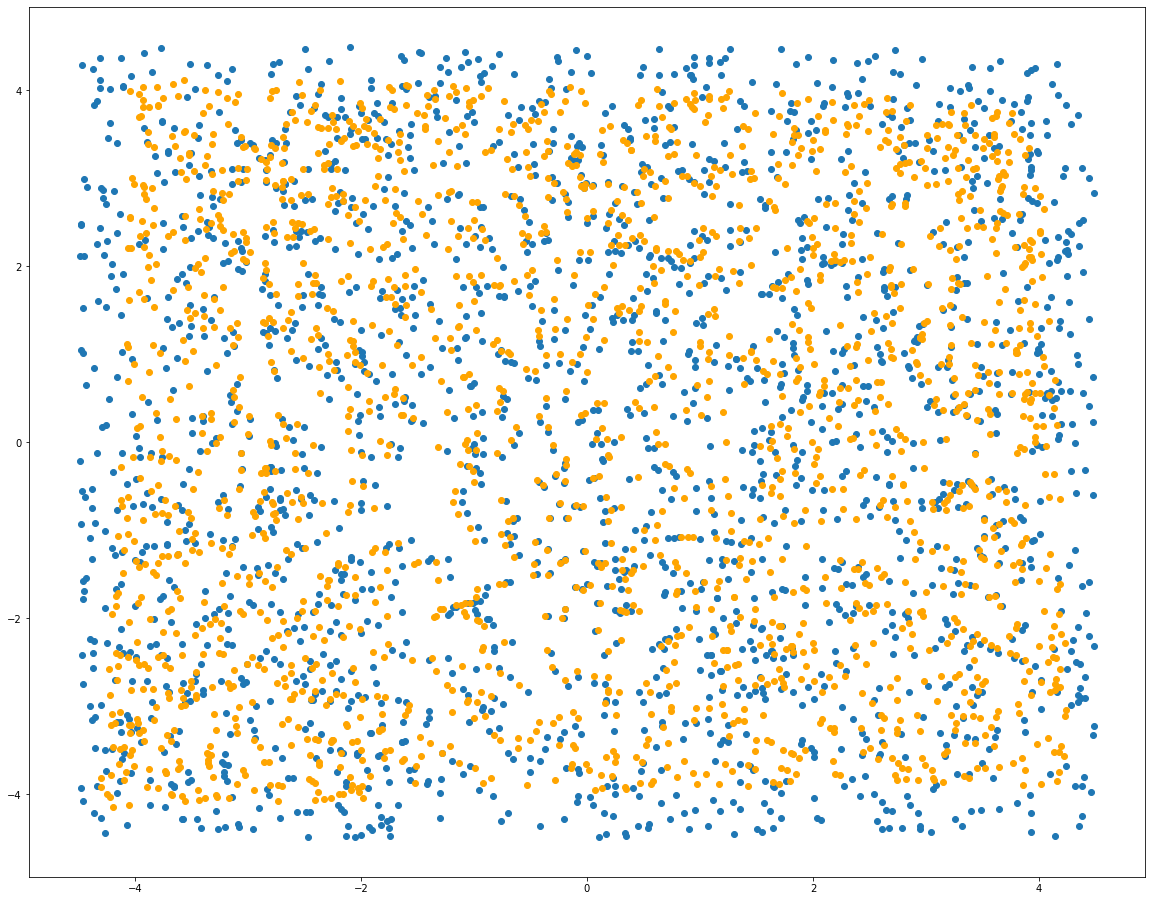

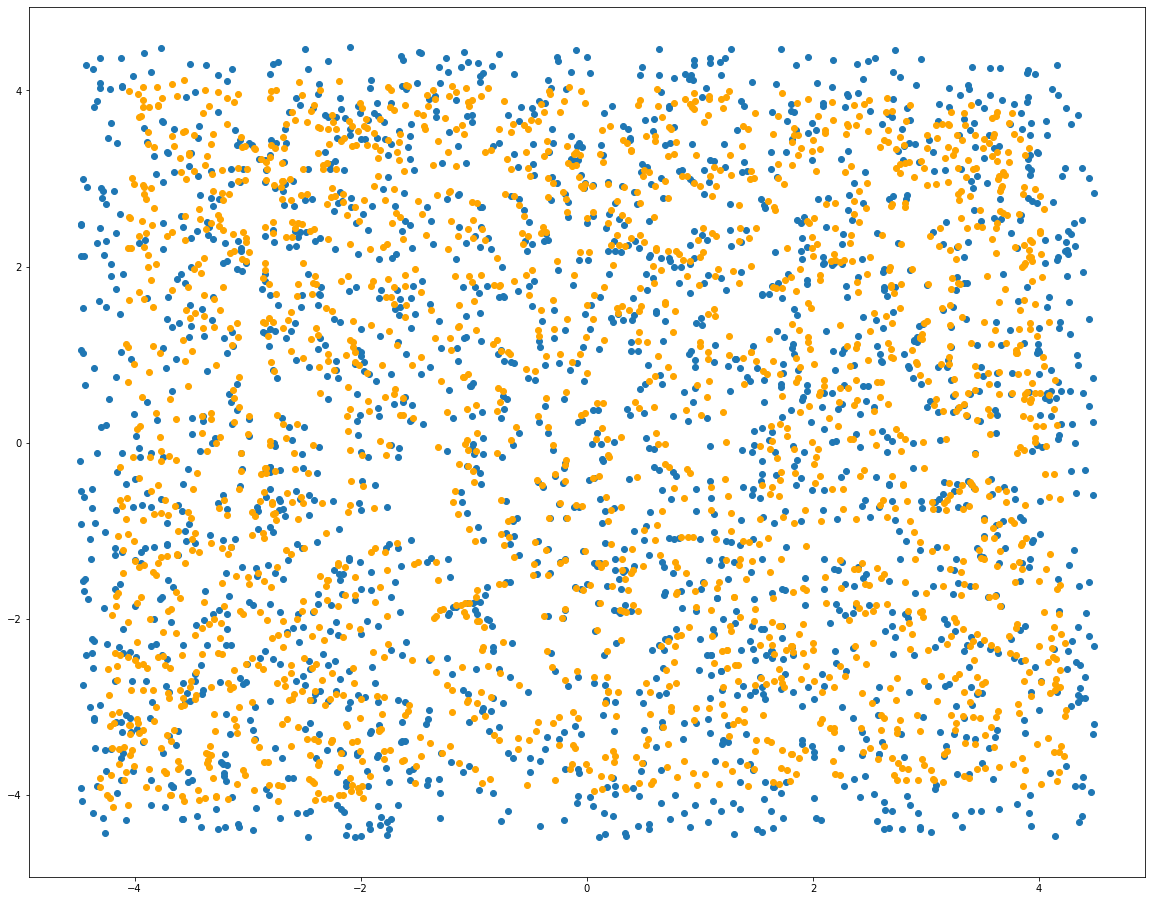

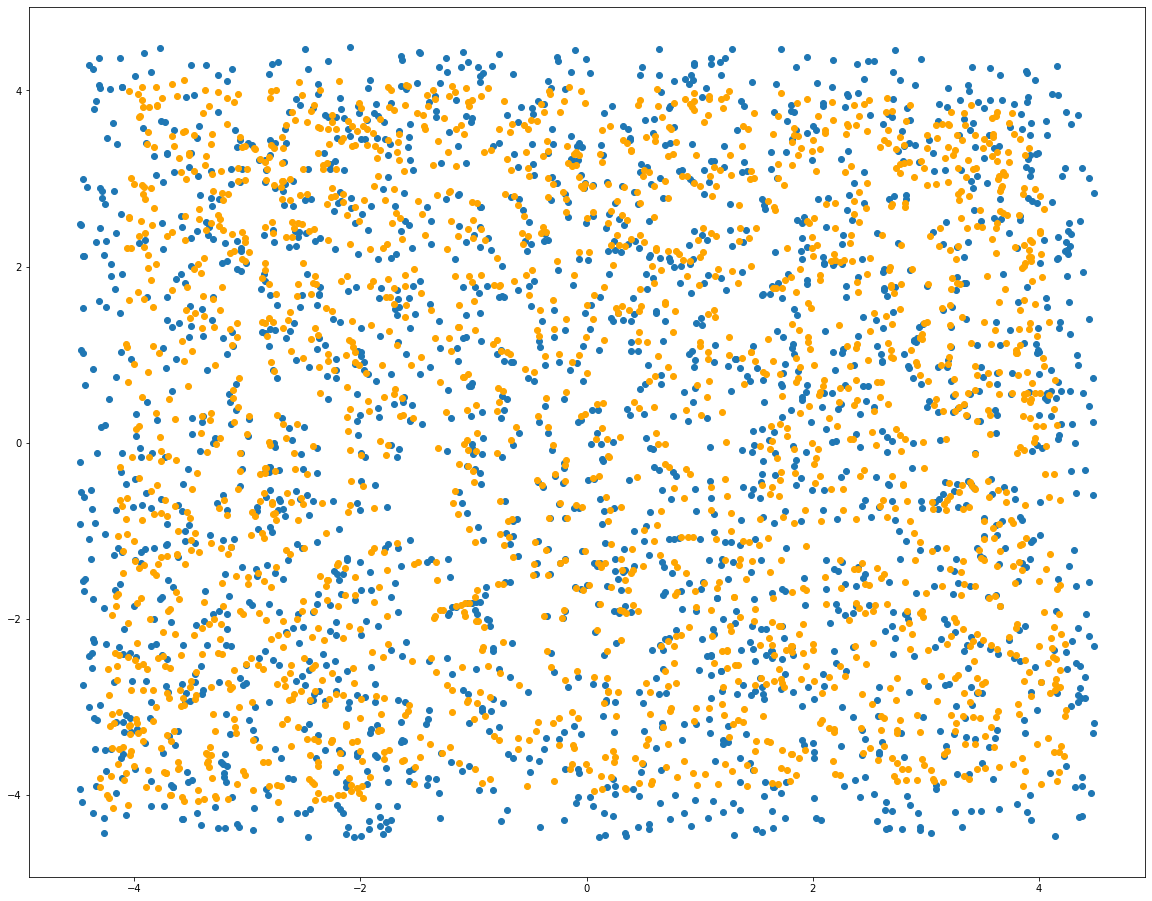

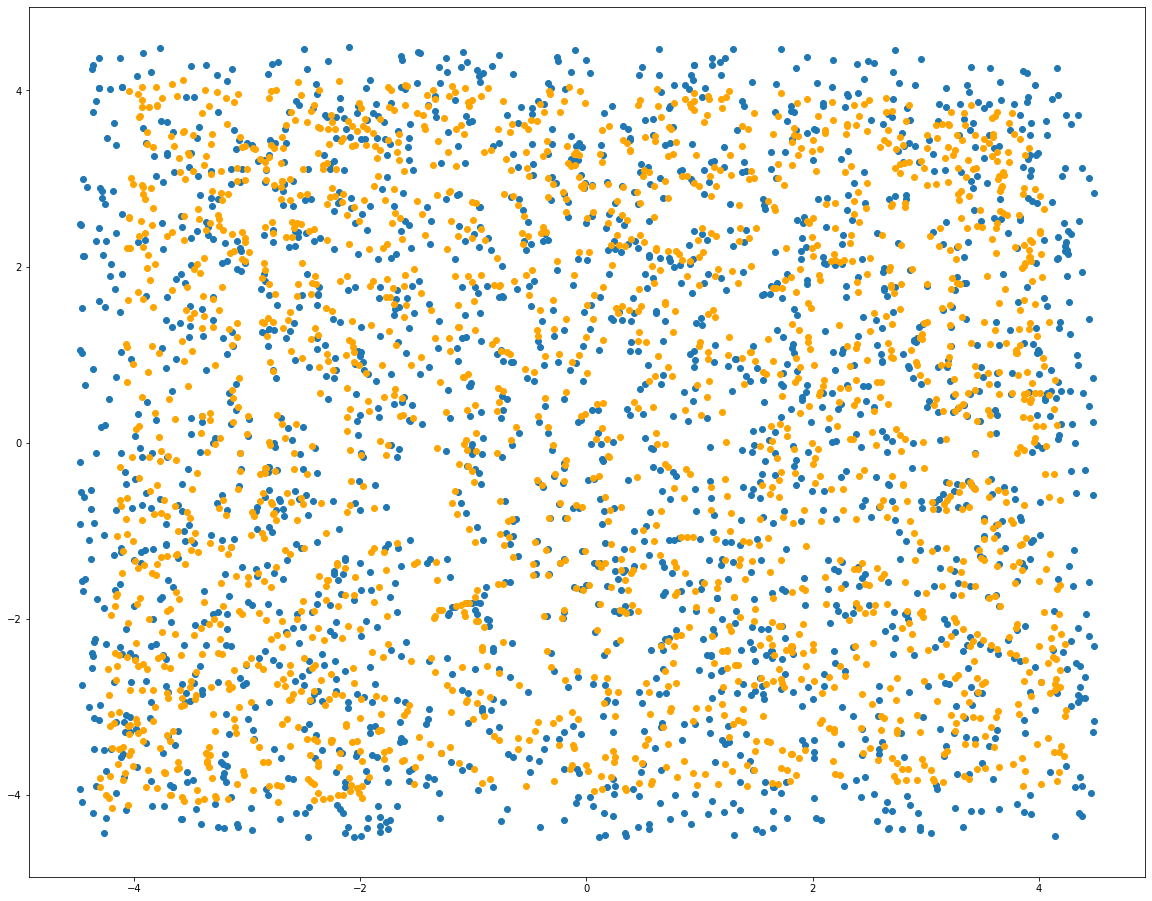

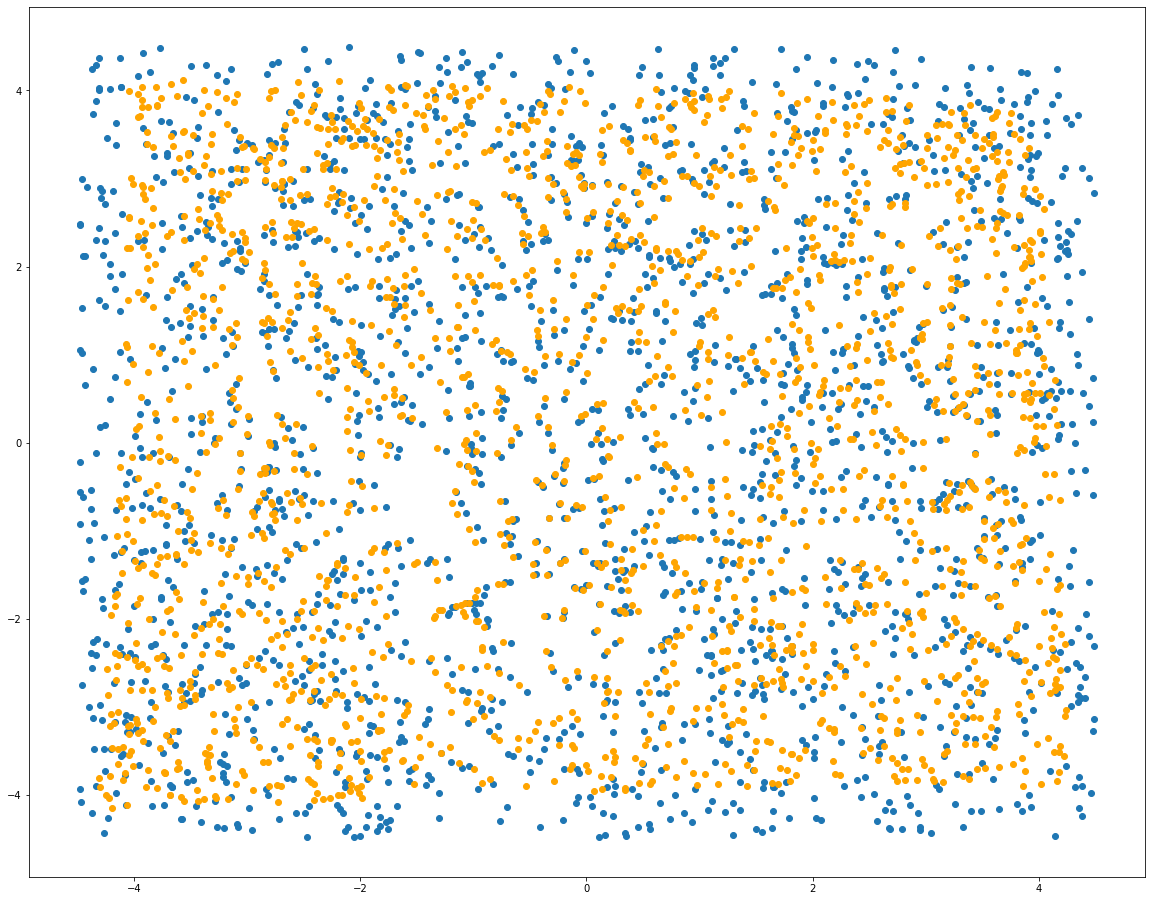

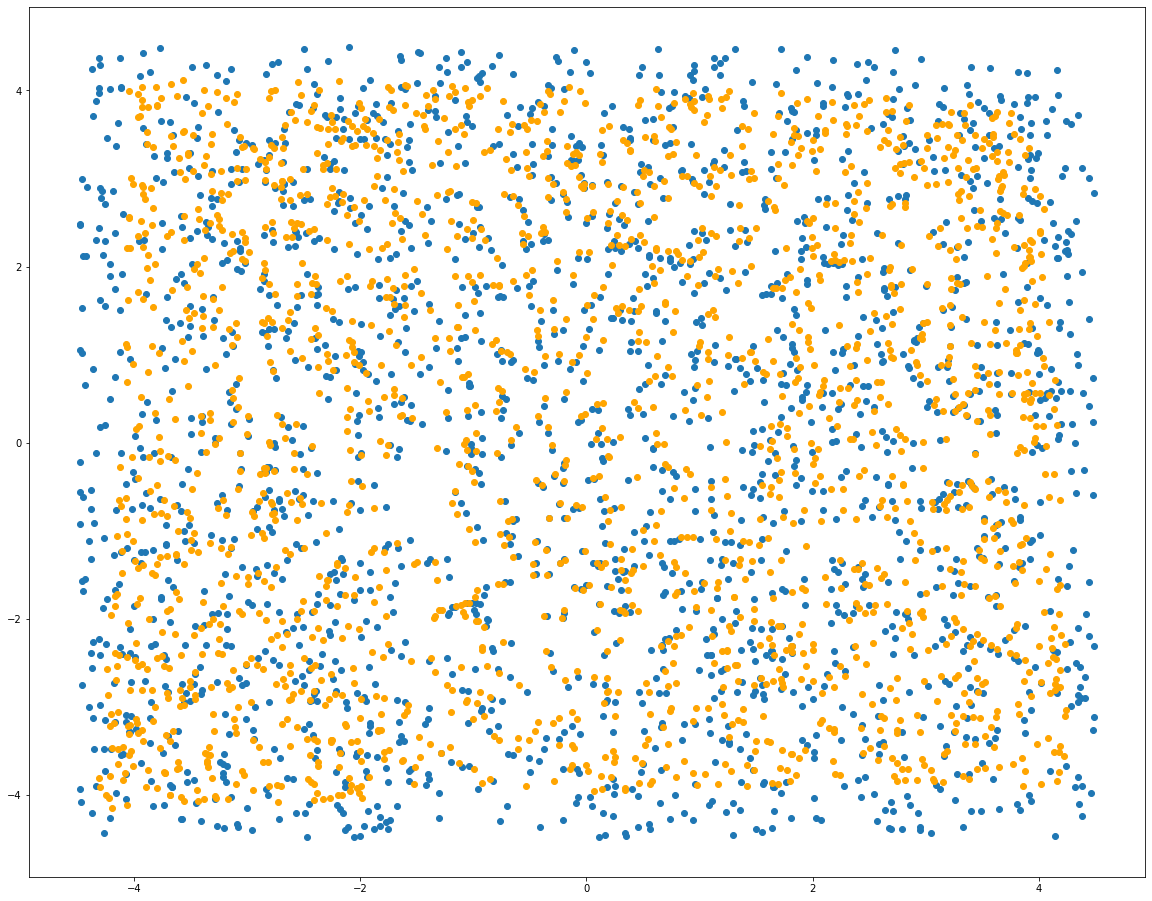

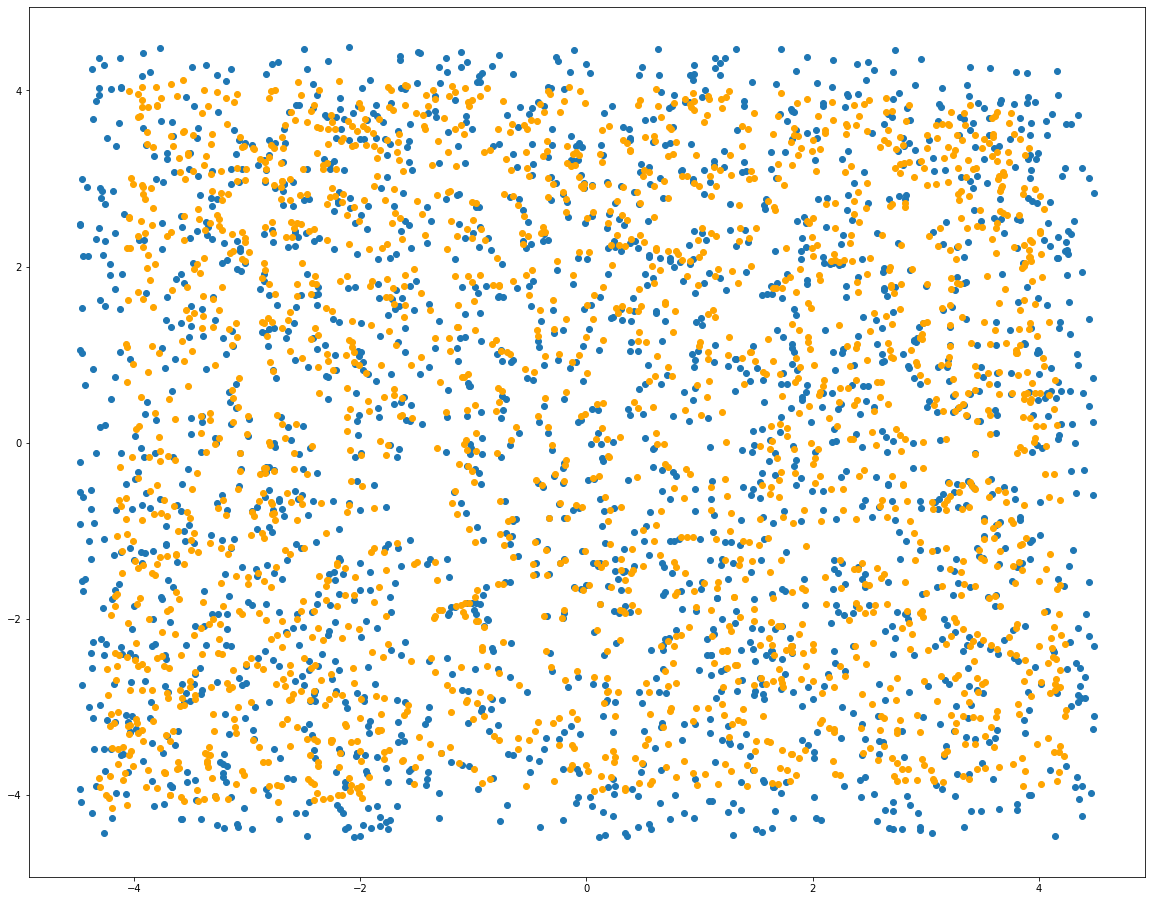

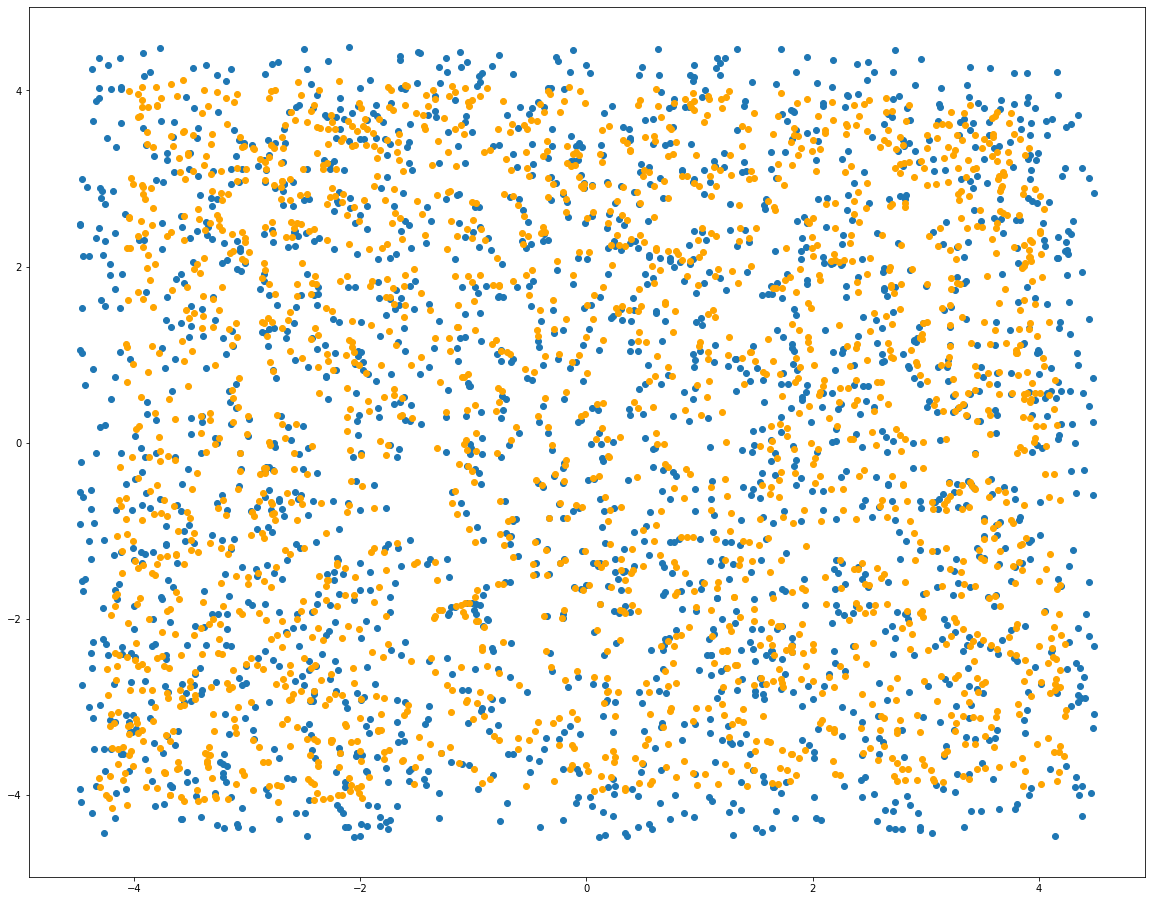

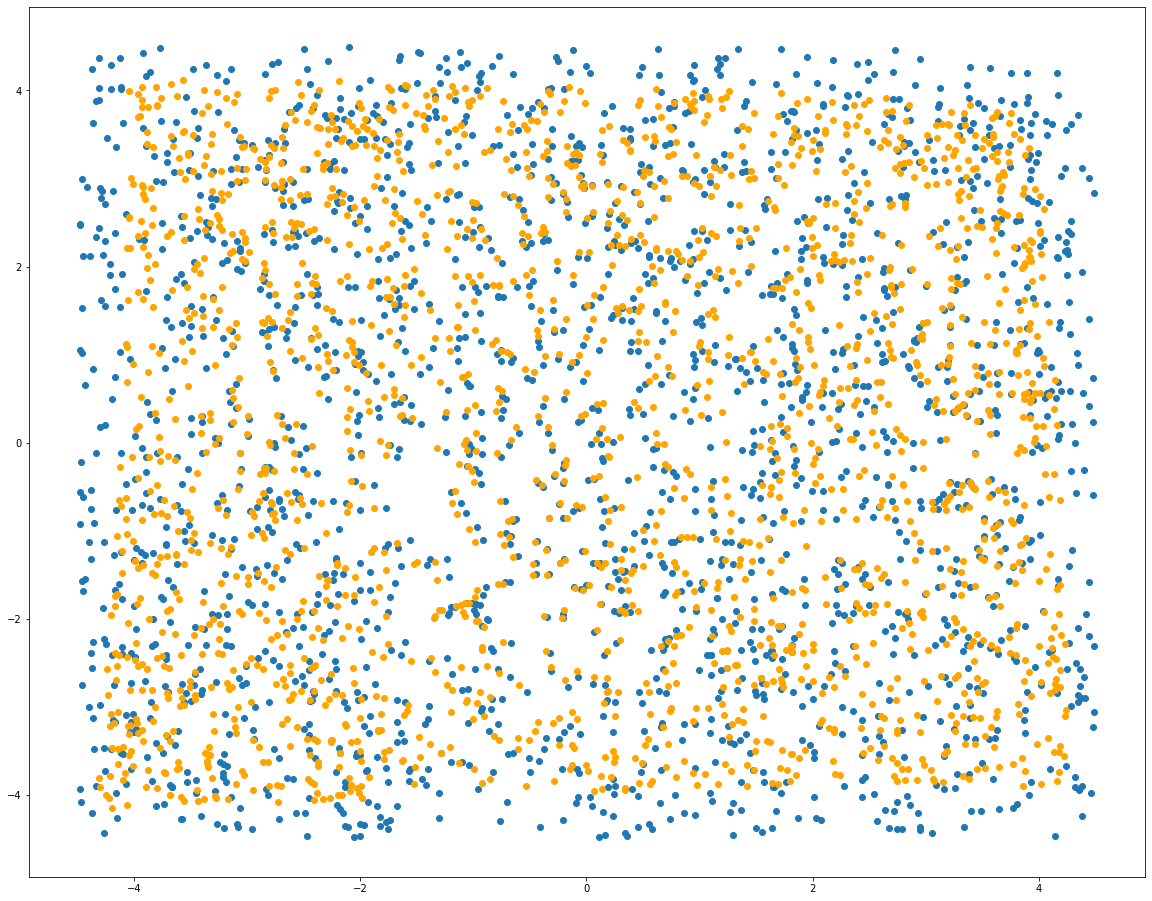

In [56]:
# possibleL = list(range(100, 1000))
# possibleEpsilon = np.round(np.arange(0.50, 1.50, 0.10), 2)

# minimumMSE = 10000
# mimumL = None
# minimumEpsilon = None
# for L, epsilon in itertools.product(possibleL, possibleEpsilon):
    
#     epsilon = 0.005
#     L = 100
    
#     x = approximateNonLinearFunction(np.column_stack((x0Data[:,0], v[:,0])), L, epsilon)

#     y = approximateNonLinearFunction(np.column_stack((x0Data[:,1], v[:,1])), L, epsilon)
    
#     mse = np.mean(np.sqrt(np.square(x1Data[:,0] - x) + np.square(x1Data[:,1] - y)))
    
#     if mse < minimumMSE:
#         minimumL = L
#         minimumEpsilon = epsilon
#         minimumMSE = mse
    
#     break

# best combination of epsilon & L
epsilon = 0.005
L = 100
x = approximateNonLinearFunction(np.column_stack((x0Data[:,0], v[:,0])), L, epsilon)
y = approximateNonLinearFunction(np.column_stack((x0Data[:,1], v[:,1])), L, epsilon)    
mse = np.mean(np.sqrt(np.square(x1Data[:,0] - x) + np.square(x1Data[:,1] - y)))


for t in np.arange(0.1,1.0, 0.1):
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(16)
    plt.scatter((x0Data[:,0] + x*t), (x0Data[:,1] + y*t))
    plt.scatter(x1Data[:,0], x1Data[:,1], color='orange');
    plt.show()

## 3rd Part - The evolution of the system

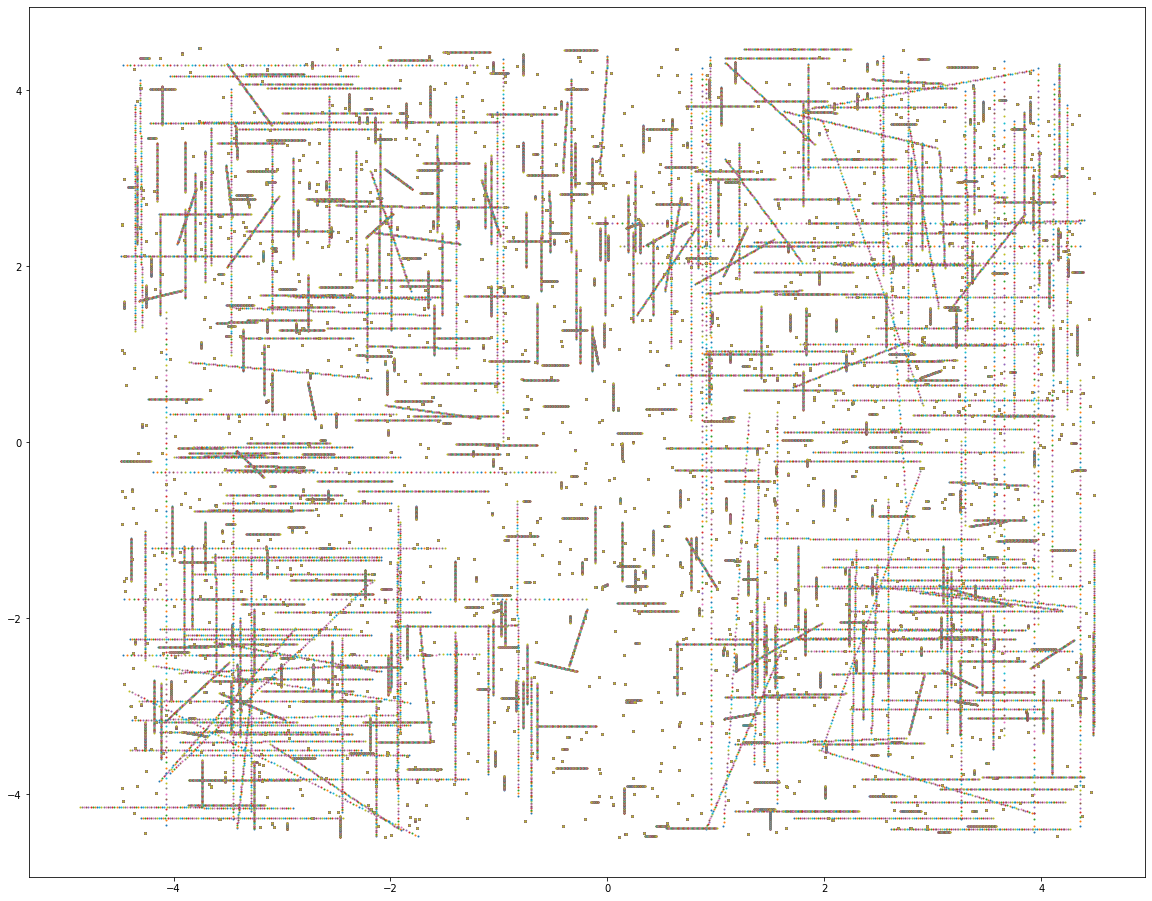

In [65]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(16)
for t in np.arange(0.1,10.0, 0.1):
    plt.scatter((x0Data[:,0] + x*t), (x0Data[:,1] + y*t), s=1)
plt.show()